<a href="https://colab.research.google.com/github/sergiyromanenko/CV-HW/blob/master/lesson_14/homework/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)


### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

<ipython-input-50-fb7e7247ef37>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


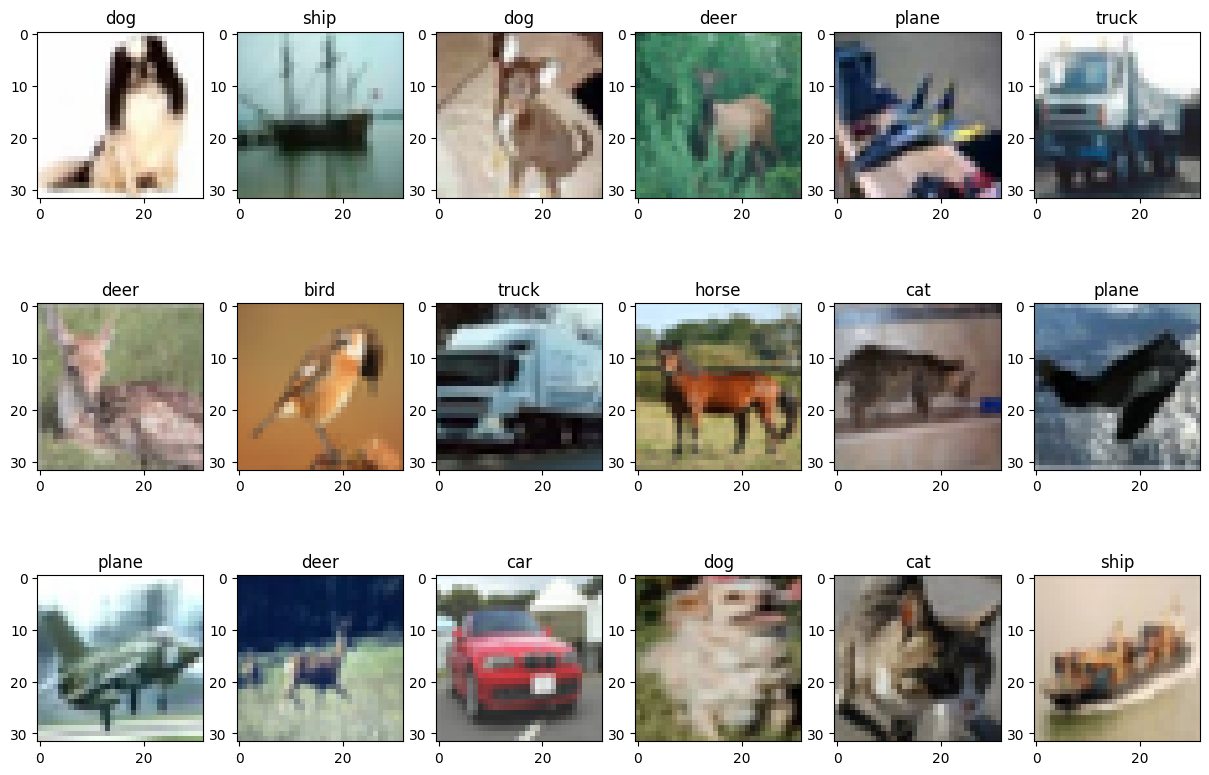

In [50]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(y_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])


Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

According histogram the training batches contain exactly 5000 images from each class.


Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'counts'))

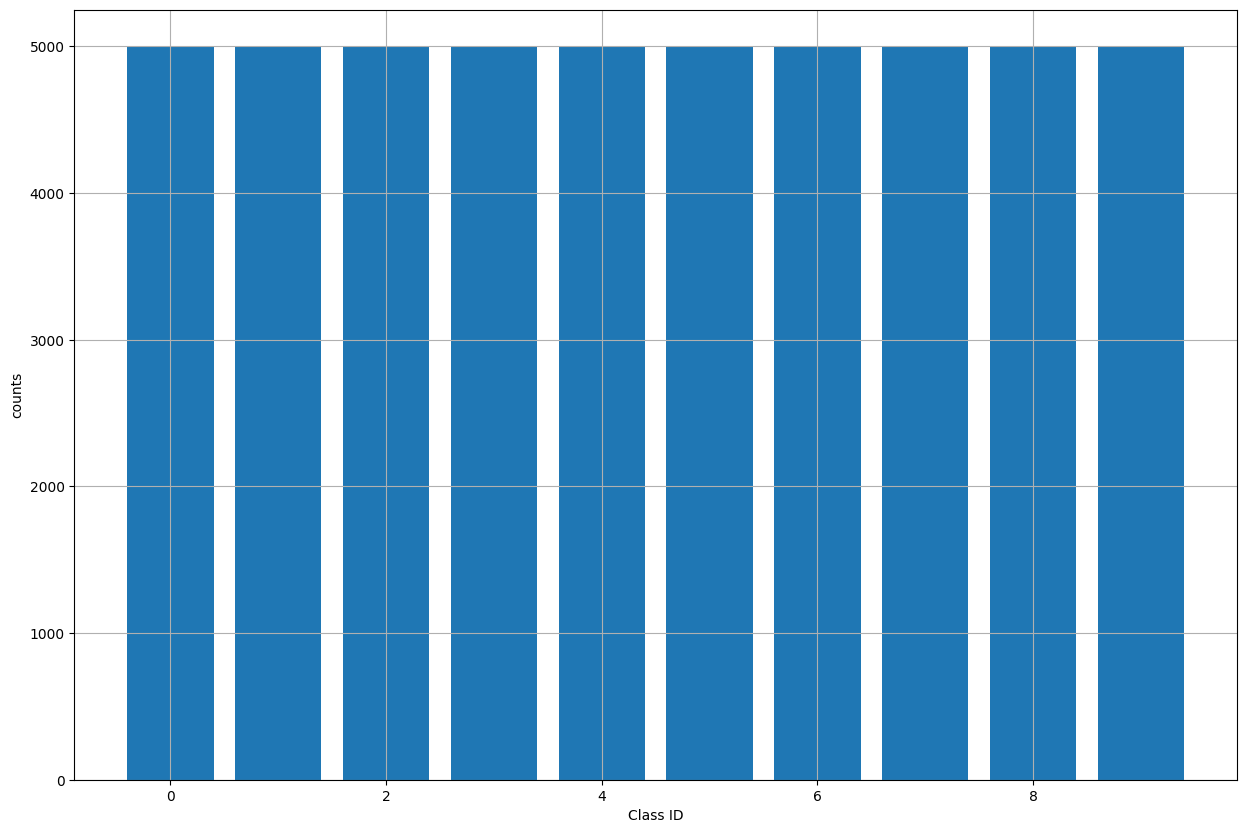

In [16]:
# Compute the class histogram

centers = np.arange(0, num_classes + 1)
counts, bounds = np.histogram(y_train, bins=centers-0.5)

plt.bar(centers[:-1], counts), plt.grid(True)
plt.xlabel('Class ID'), plt.ylabel('counts')


### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [51]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)


Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [18]:
# Build the classifier
inputs = Input(shape=(size, size, 3))
net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

print(model.output_shape)
print(y_train.shape)
print(y_test.shape)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0   

### Step 3: Training

Compile the model and train it.

In [19]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)


Epoch 1/25
352/352 [==============================] - 5s 8ms/step - loss: 1.7542 - accuracy: 0.3747 - val_loss: 1.5898 - val_accuracy: 0.4406
Epoch 2/25
352/352 [==============================] - 2s 5ms/step - loss: 1.4505 - accuracy: 0.4906 - val_loss: 1.3728 - val_accuracy: 0.5150
Epoch 3/25
352/352 [==============================] - 2s 5ms/step - loss: 1.3348 - accuracy: 0.5342 - val_loss: 1.2810 - val_accuracy: 0.5538
Epoch 4/25
352/352 [==============================] - 2s 5ms/step - loss: 1.2570 - accuracy: 0.5608 - val_loss: 1.2083 - val_accuracy: 0.5810
Epoch 5/25
352/352 [==============================] - 2s 6ms/step - loss: 1.2022 - accuracy: 0.5829 - val_loss: 1.1677 - val_accuracy: 0.5954
Epoch 6/25
352/352 [==============================] - 2s 6ms/step - loss: 1.1555 - accuracy: 0.5967 - val_loss: 1.1254 - val_accuracy: 0.6154
Epoch 7/25
352/352 [==============================] - 2s 5ms/step - loss: 1.1178 - accuracy: 0.6109 - val_loss: 1.1287 - val_accuracy: 0.6044
Epoch 

Train Acc      0.7022888660430908
Validation Acc 0.6647999882698059


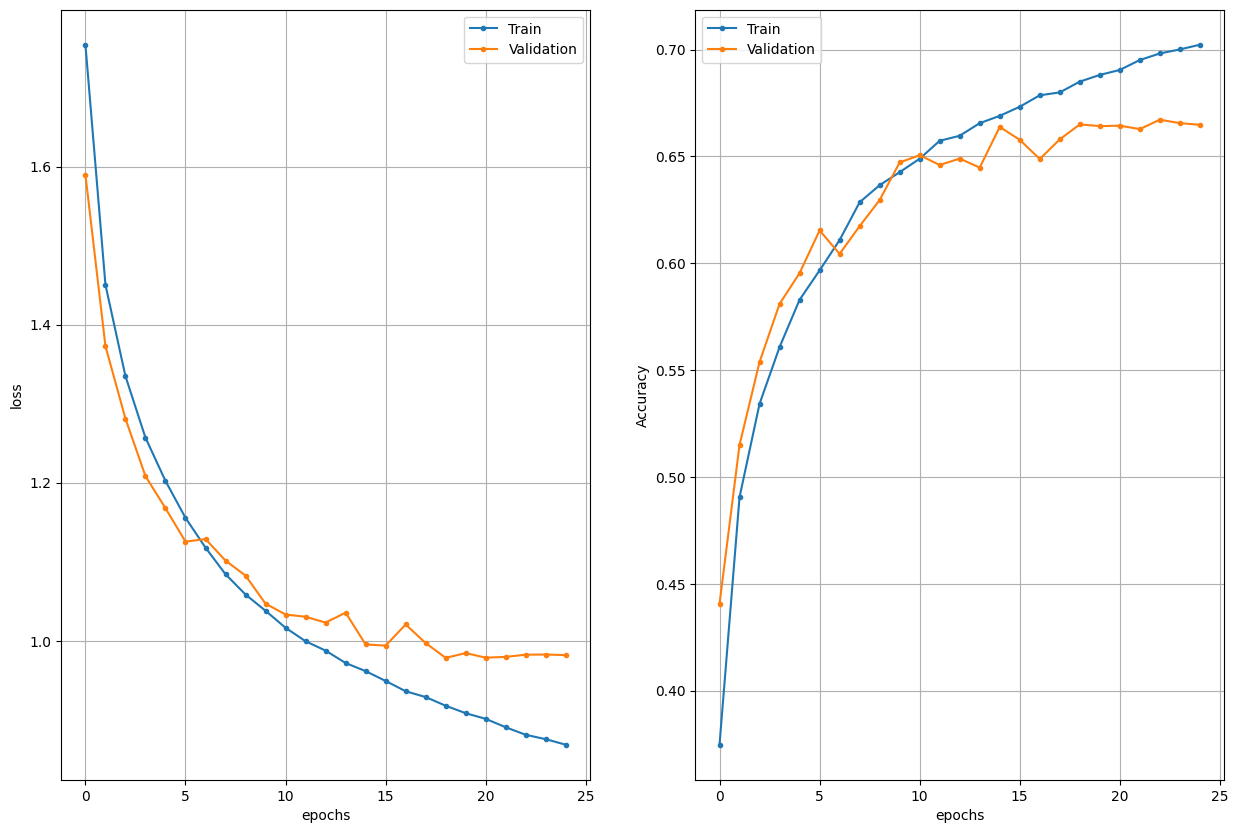

In [20]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [21]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 [==============================] - 1s 2ms/step
True [3 8 8 0 6]
Pred [3 8 1 0 6]
Pred [[1.6365155e-03 1.5560949e-04 2.1691842e-02 7.2823036e-01 7.6198141e-04
  2.1867259e-01 4.6956087e-03 1.5641778e-03 2.2067280e-02 5.2405137e-04]
 [1.2468218e-02 4.7646859e-01 1.0991537e-05 1.5837762e-07 5.5711348e-07
  3.2332765e-09 7.2953261e-09 5.9001258e-07 5.0072342e-01 1.0327421e-02]
 [1.4226638e-01 4.0809596e-01 2.2340550e-03 2.4998046e-03 1.4509619e-03
  4.3424265e-04 1.2206613e-04 2.5896935e-03 4.0026563e-01 4.0041182e-02]
 [9.4790149e-01 1.7834511e-02 4.1402434e-03 3.5584241e-04 1.4322981e-03
  3.8176626e-05 3.3751472e-05 8.6784264e-04 2.6218850e-02 1.1770235e-03]
 [7.2190214e-06 2.3702755e-04 1.7681440e-02 1.7163889e-01 3.4309721e-01
  5.1616900e-02 4.1498455e-01 1.4369031e-04 4.6254002e-04 1.3050019e-04]]
(10000, 10)


In [22]:
y_pred = np.argmax(y_pred, axis=1)

# Compute and print the accuracy for each class
for class_id, class_name in classes.items():

  mask = y_true == class_id

  #tp = np.sum(np.abs(y_pred[mask] - class_id) < 0.5)
  tp = np.sum(y_pred[mask] == class_id)
  total = np.sum(mask)

  acc = tp/total
  print(class_name, acc)

plane 0.725
car 0.798
bird 0.617
cat 0.471
deer 0.484
dog 0.552
frog 0.7
horse 0.778
ship 0.749
truck 0.682


In [23]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0127 - accuracy: 0.6556
Test loss   1.0127203464508057
Test metric 0.6556000113487244


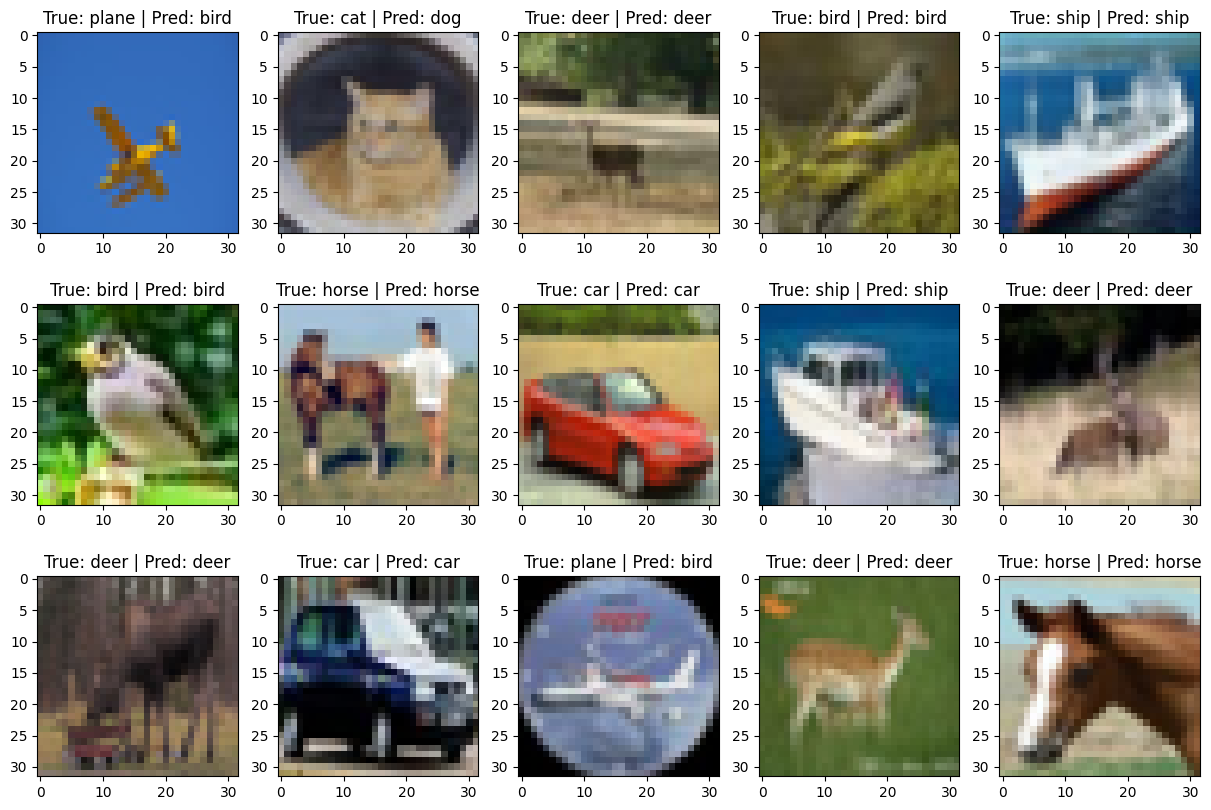

In [24]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx =  np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?

accuracy: 0.6556

* What modifications would you do in order to improve the classification accuracy?


1) Increase Model Complexity: increasing the depth of the network by adding more convolutional layers or increasing the number of filters in each layer.

2) Data Augmentation: Since we have a limited amount of training data, we can augment dataset by applying transformations such as rotation, flipping, scaling, and shifting to the existing images. This augmentation can help the model generalize better to unseen data.

3) Hyperparameter Tuning: Experiment with different hyperparameters such as batch size, optimizer choice, kernel size, etc., to find the combination that works best for this dataset.

4) Data Preprocessing: Consider different data preprocessing techniques such as centering the data, standardization, or applying other normalization techniques that might improve convergence during training.


# Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

My one modification - increasing the number of filters in each layer.

In [27]:
# Build the classifier
inputs = Input(shape=(size, size, 3))
net = Conv2D(64, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

print(model.output_shape)
print(y_train.shape)
print(y_test.shape)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0   

In [28]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 [==============================] - 5s 10ms/step - loss: 1.5617 - accuracy: 0.4441 - val_loss: 1.4488 - val_accuracy: 0.5012
Epoch 2/25
352/352 [==============================] - 3s 7ms/step - loss: 1.2267 - accuracy: 0.5723 - val_loss: 1.1830 - val_accuracy: 0.5852
Epoch 3/25
352/352 [==============================] - 3s 7ms/step - loss: 1.0857 - accuracy: 0.6249 - val_loss: 1.0339 - val_accuracy: 0.6386
Epoch 4/25
352/352 [==============================] - 3s 7ms/step - loss: 0.9964 - accuracy: 0.6548 - val_loss: 0.9730 - val_accuracy: 0.6632
Epoch 5/25
352/352 [==============================] - 3s 8ms/step - loss: 0.9371 - accuracy: 0.6789 - val_loss: 0.9587 - val_accuracy: 0.6702
Epoch 6/25
352/352 [==============================] - 3s 8ms/step - loss: 0.8900 - accuracy: 0.6953 - val_loss: 0.9127 - val_accuracy: 0.6884
Epoch 7/25
352/352 [==============================] - 3s 8ms/step - loss: 0.8451 - accuracy: 0.7114 - val_loss: 0.9363 - val_accuracy: 0.6820
Epoch

Train Acc      0.8697555661201477
Validation Acc 0.7095999717712402


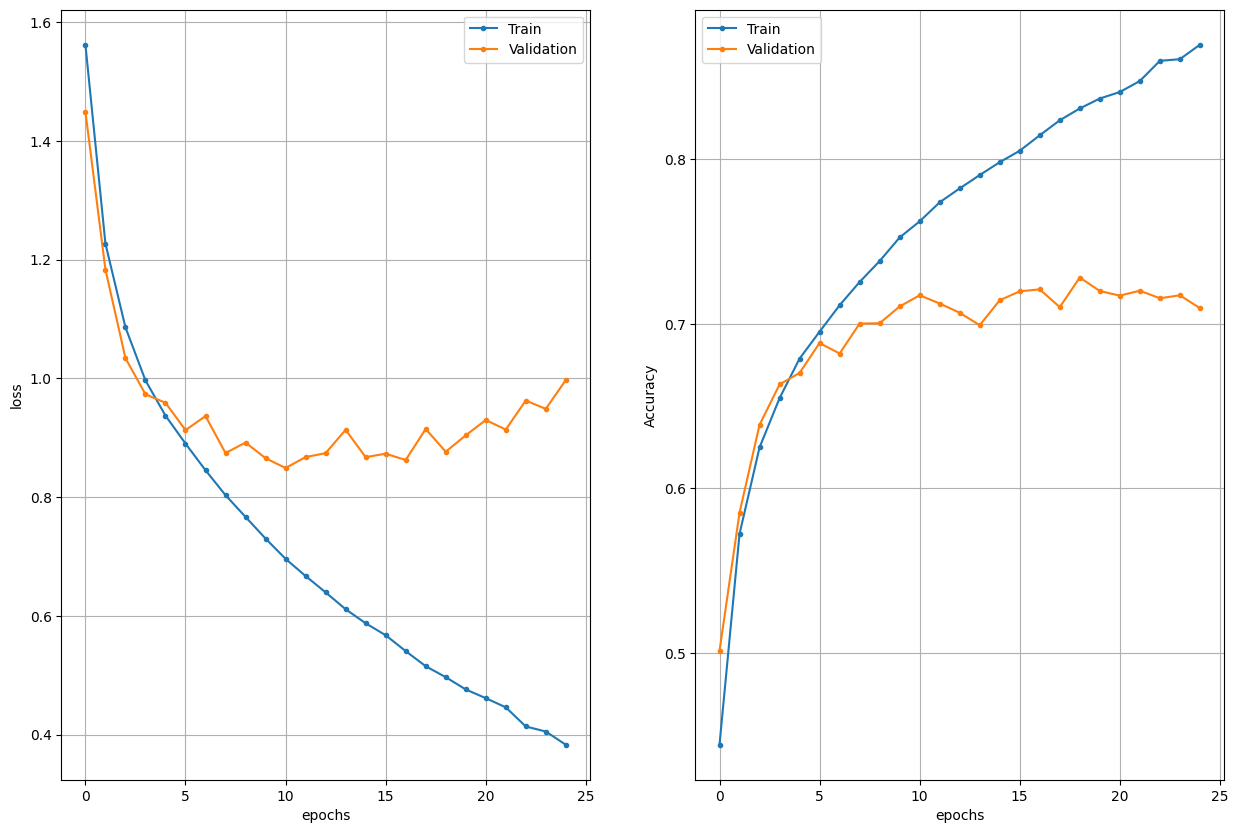

In [29]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

In [30]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 [==============================] - 1s 3ms/step
True [3 8 8 0 6]
Pred [3 8 8 0 6]
Pred [[8.45480303e-04 2.36368840e-04 4.07496584e-04 7.53131628e-01
  8.85785790e-04 5.26510514e-02 4.36778925e-03 4.32146917e-05
  1.73927903e-01 1.35032535e-02]
 [3.36076412e-03 9.31249782e-02 1.63770864e-08 3.49288043e-09
  9.50611187e-11 6.13517293e-11 1.56209316e-11 8.45923886e-10
  9.03506398e-01 7.86688179e-06]
 [3.08321208e-01 6.18085600e-02 4.54173918e-04 8.04216776e-04
  2.56176572e-04 7.23330362e-04 4.36926621e-06 4.28786222e-03
  6.14281118e-01 9.05904826e-03]
 [9.74655092e-01 3.00997240e-03 8.50483077e-04 4.38317948e-05
  2.38466218e-05 1.23989238e-07 2.46843229e-07 5.63038114e-08
  2.13941708e-02 2.22132530e-05]
 [9.50452943e-08 9.10611925e-06 6.58540949e-02 4.40529268e-03
  2.45462522e-01 1.05107414e-04 6.84145451e-01 1.10553433e-08
  1.81631094e-05 2.07438092e-07]]
(10000, 10)


In [31]:
y_pred = np.argmax(y_pred, axis=1)

# Compute and print the accuracy for each class
for class_id, class_name in classes.items():

  mask = y_true == class_id

  #tp = np.sum(np.abs(y_pred[mask] - class_id) < 0.5)
  tp = np.sum(y_pred[mask] == class_id)
  total = np.sum(mask)

  acc = tp/total
  print(class_name, acc)

plane 0.813
car 0.859
bird 0.639
cat 0.471
deer 0.632
dog 0.676
frog 0.658
horse 0.718
ship 0.769
truck 0.796


In [32]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0323 - accuracy: 0.7031
Test loss   1.0322761535644531
Test metric 0.7031000256538391


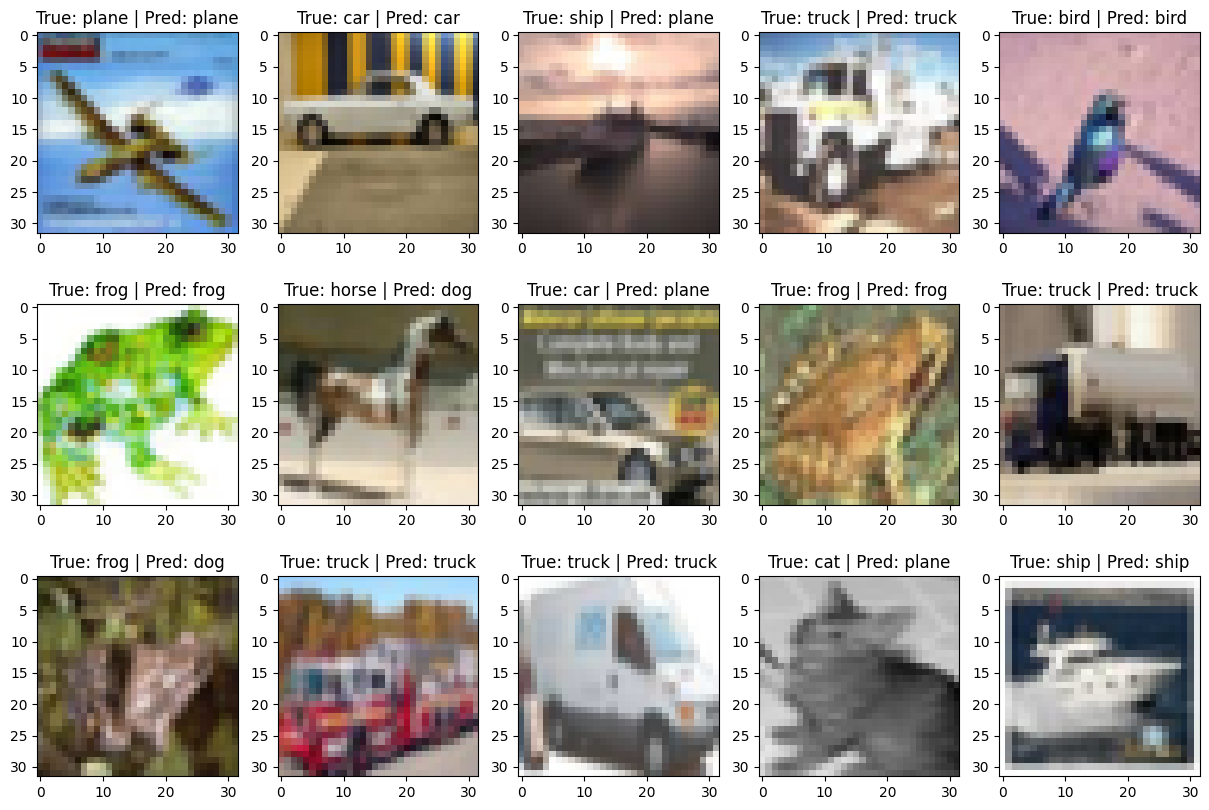

In [33]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx =  np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))


Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?

previous accuracy: 0.6556

current accuracy: 0.7031

Accuracy slightly improved by 4.5%

#Make one modification (that you think can help) and train the classifier again.

I will try to do data augmentation also

To improve the model's generalization ability, we implement data augmentation. This technique artificially expands the training dataset by applying random transformations (e.g., rotations, shifts, flips) to the training images. It helps the model learn from a more diversified set of data, reducing the risk of overfitting.

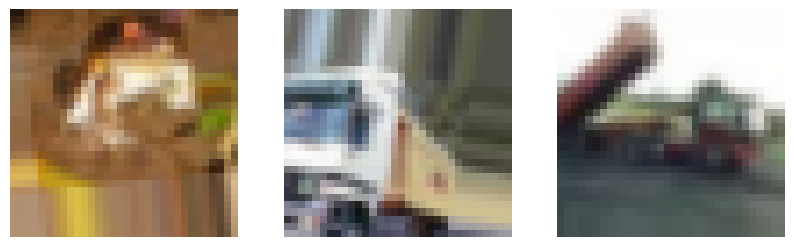

Training data shape: (50000, 32, 32, 3)
Training target shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3)
Testing target shape: (10000, 10)


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)
# Visualize some augmented images
num_samples = 3
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    augmented_img = datagen.random_transform(x_train[i])
    plt.imshow(augmented_img)
    plt.axis('off')
plt.show()

# Create augmented data generator
batch_size = 128
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

# Example of how to use augmented data generator for training
# model.fit(augmented_data_generator, steps_per_epoch=len(x_train) // batch_size, epochs=epochs)

# Confirming the shape of the preprocessed data
print(f"Training data shape: {x_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing target shape: {y_test.shape}")

In [56]:
# Build the classifier
inputs = Input(shape=(size, size, 3))
net = Conv2D(64, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

print(model.output_shape)
print(y_train.shape)
print(y_test.shape)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0   

In [58]:
epochs = 25


# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(augmented_data_generator, epochs=epochs)
print('Elapsed time', time() - start)

Epoch 1/25
391/391 [==============================] - 31s 75ms/step - loss: 1.7869 - accuracy: 0.3484
Epoch 2/25
391/391 [==============================] - 30s 77ms/step - loss: 1.5618 - accuracy: 0.4391
Epoch 3/25
391/391 [==============================] - 29s 73ms/step - loss: 1.4597 - accuracy: 0.4814
Epoch 4/25
391/391 [==============================] - 30s 76ms/step - loss: 1.3959 - accuracy: 0.5066
Epoch 5/25
391/391 [==============================] - 29s 74ms/step - loss: 1.3423 - accuracy: 0.5231
Epoch 6/25
391/391 [==============================] - 29s 75ms/step - loss: 1.2949 - accuracy: 0.5415
Epoch 7/25
391/391 [==============================] - 30s 77ms/step - loss: 1.2601 - accuracy: 0.5557
Epoch 8/25
391/391 [==============================] - 29s 73ms/step - loss: 1.2418 - accuracy: 0.5630
Epoch 9/25
391/391 [==============================] - 30s 76ms/step - loss: 1.2147 - accuracy: 0.5737
Epoch 10/25
391/391 [==============================] - 29s 73ms/step - loss: 1.189

KeyError: 'val_loss'

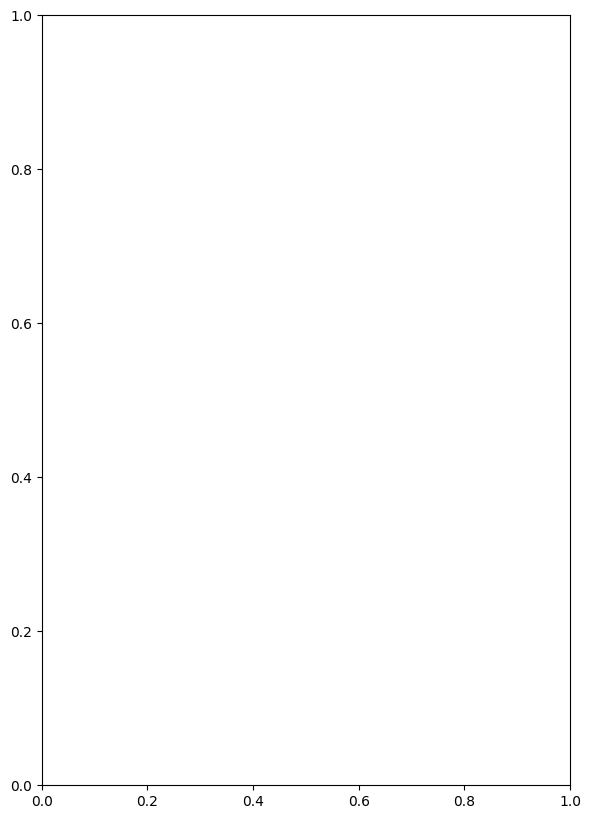

In [63]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

In [61]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute and print the accuracy for each class
for class_id, class_name in classes.items():

  mask = y_true == class_id

  #tp = np.sum(np.abs(y_pred[mask] - class_id) < 0.5)
  tp = np.sum(y_pred[mask] == class_id)
  total = np.sum(mask)

  acc = tp/total
  print(class_name, acc)

313/313 [==============================] - 1s 2ms/step
plane 0.696
car 0.902
bird 0.452
cat 0.573
deer 0.64
dog 0.493
frog 0.874
horse 0.827
ship 0.739
truck 0.878


In [62]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8556 - accuracy: 0.7074
Test loss   0.8555850386619568
Test metric 0.7074000239372253


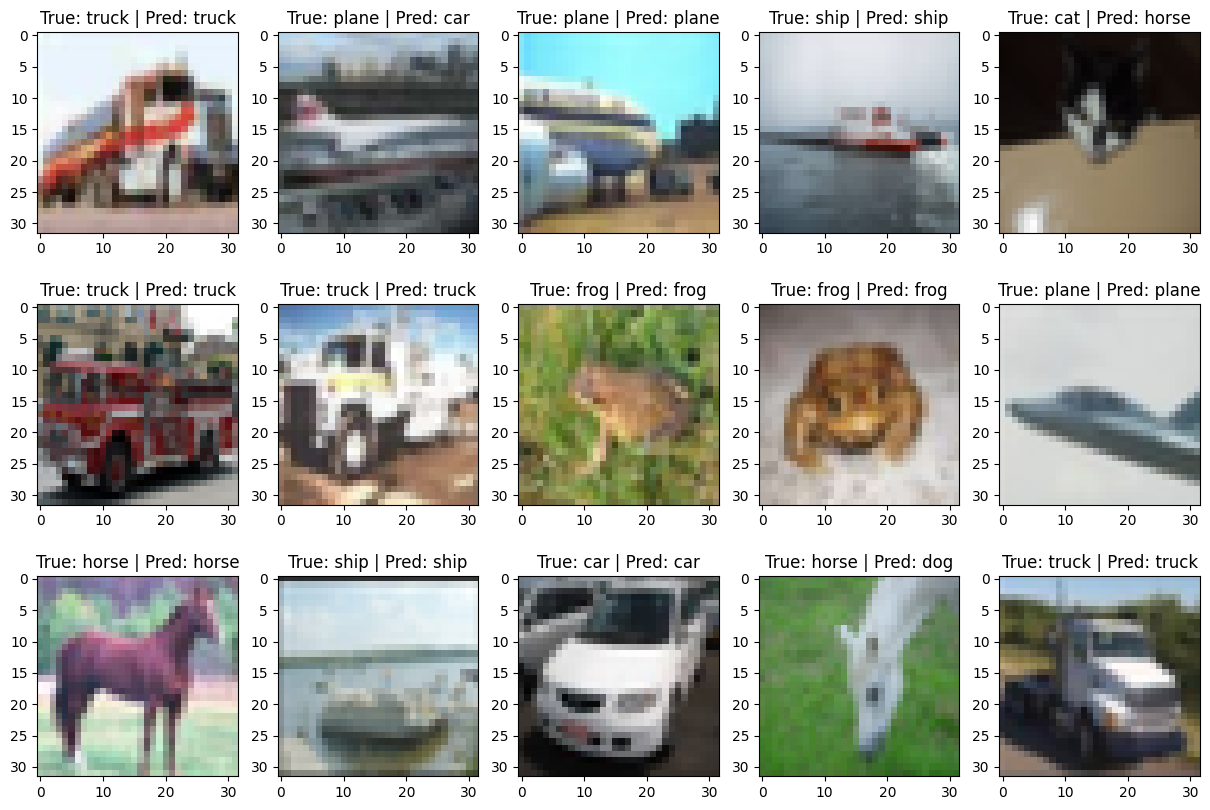

In [64]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx =  np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

Unfortunately, data augmentation did not improve the result